<a href="https://colab.research.google.com/github/DavidSchneider47/National-TOD-Atlas/blob/main/Race_Ethnicity_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Merge 2020 Facility Data with Station Key**

In [ ]:
import pandas as pd

# Step 1: Load the datasets
df_population = pd.read_csv('/content/2020_Stations_Consolidated_RE.csv')
df_station_key = pd.read_csv('/content/StationKey.csv')

# Step 2: Fix the mislabeling in the population dataset
# It was discovered that "Facility ID" was mislabeled as "Facility I" in df_population
df_population_corrected = df_population.rename(columns={"Facility I": "Facility ID"})

# Step 3: Ensure both "Facility ID" columns are of the same data type (string) for a successful merge
df_station_key['Facility ID'] = df_station_key['Facility ID'].astype(str)
df_population_corrected['Facility ID'] = df_population_corrected['Facility ID'].astype(str)

# Step 4: Merge the datasets on "Facility ID"
df_merged_corrected = pd.merge(df_station_key, df_population_corrected, on="Facility ID", how="inner")

# Step 5: Save the merged dataframe to a new CSV file
merged_file_path_corrected = 'Merged_Stations_Data_Corrected.csv'
df_merged_corrected.to_csv(merged_file_path_corrected, index=False)


# **Merge 2020 and 2010 Station Data**

In [ ]:
import pandas as pd

# Load the 2020 corrected merged data
df_merged_1 = pd.read_csv('/content/Merged_Stations_Data_Corrected.csv')

# Load the 2010 data
df_2010 = pd.read_csv('/content/USE_THIS_2010_RE_stations_consolidated.csv')

# Correct the column name in the 2010 data to match the merged data's "Facility ID" column
df_2010_corrected = df_2010.rename(columns={"Facility I": "Facility ID"})

# Ensure both "Facility ID" columns are of the same data type (string) for a successful merge
df_2010_corrected['Facility ID'] = df_2010_corrected['Facility ID'].astype(str)
df_merged_1['Facility ID'] = df_merged_1['Facility ID'].astype(str)

# Perform the merge on "Facility ID"
df_final_merged = pd.merge(df_merged_1, df_2010_corrected, on="Facility ID", how="inner")

# Save the final merged dataframe to a new CSV file
final_merged_file_path = 'Final_Merged_Stations_Data.csv'
df_final_merged.to_csv(final_merged_file_path, index=False)


# **Add Columns for 2020-2010 Percentage Chnages for All Groups**

In [ ]:
#see attachd file that was compiled offline in excel

# **Load Data, Clean Data to Replace '#DIV/0!' with NaN**

In [ ]:
import pandas as pd

# Load the data
data = pd.read_csv('/content/RE_Correlations_systems_REVISED_V2.csv')

# Replace '#DIV/0!' with NaN
data.replace('#DIV/0!', pd.NA, inplace=True)

# Save the cleaned data if you want to use it later
data.to_csv('path_to_cleaned_file.csv', index=False)


In [ ]:
data.shape

(3732, 71)

In [ ]:
# Convert all columns of type 'object' to 'float'
for col in data.columns:
    if data[col].dtype == object:
        try:
            data[col] = pd.to_numeric(data[col], errors='coerce')
        except ValueError:
            pass  # This column cannot be converted to float

data.to_csv('modified_file.csv', index=False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 71 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Facility ID                  3732 non-null   int64  
 1   Facility Name                0 non-null      float64
 2   Transit Agency Name          0 non-null      float64
 3   TOD Score                    3732 non-null   float64
 4   Walk Score                   3732 non-null   int64  
 5   Amenities                    3732 non-null   int64  
 6   Designated Land Use          3732 non-null   int64  
 7   Housing Change               3732 non-null   float64
 8   2020_Median_Home_Value       3732 non-null   int64  
 9   2020_Median_Rent             3732 non-null   int64  
 10  %_HV_Change                  3732 non-null   float64
 11  %_R_Change                   3732 non-null   float64
 12  Near_Highway                 3732 non-null   int64  
 13  % Natural Features

# **Descriptive Statistics Total Population**

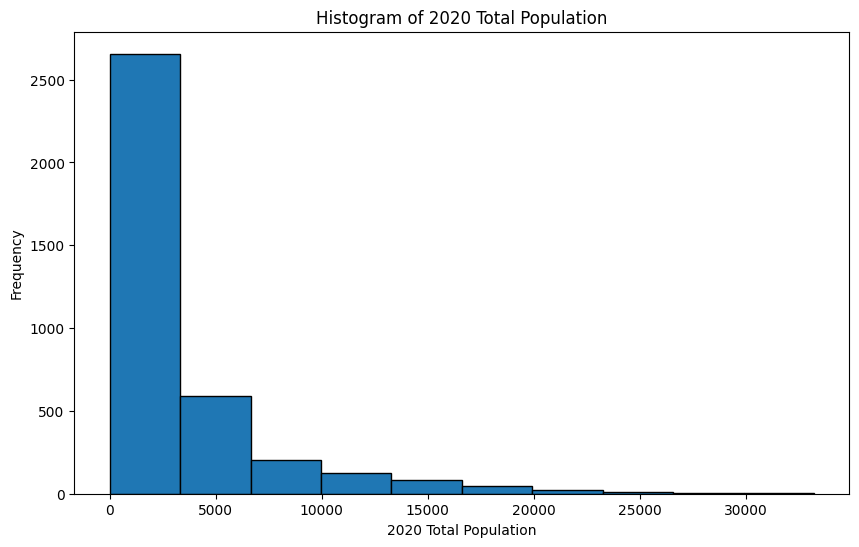

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
#df = pd.read_csv('path_to_your_file.csv')  # Replace 'path_to_your_file.csv' with the actual file path

# Plot the histogram
plt.figure(figsize=(10, 6))
data['2020_Total_Population'].plot(kind='hist', bins=10, edgecolor='black')
plt.title('Histogram of 2020 Total Population')
plt.xlabel('2020 Total Population')
plt.ylabel('Frequency')
plt.show()


# **Descriptive Statistics White vs NonWhite**

In [ ]:
# First, we will select the specific columns you're interested in from the dataset.
columns_of_interest = [
    "2020_Total_Population",
    "2010_Total_Population",
    "%_2020_White",
    "2020_%_Nonwhite",
    "%_2010_White",
    "2010_%_Nonwhite"
]

# Since the column names may have trailing spaces, we'll strip those out first.
data.columns = data.columns.str.strip()
selected_columns_data = data[columns_of_interest]

# Now, we can run the describe() method to get the summary statistics for these columns.
summary_statistics = selected_columns_data.describe().round(2)

summary_statistics


,2020_Total_Population,2010_Total_Population,%_2020_White,2020_%_Nonwhite,%_2010_White,2010_%_Nonwhite
count,3732.00,3732.00,3693.00,3693.00,3651.00,3651.00
mean,3321.17,2900.56,0.45,0.55,0.50,0.50
std,4058.74,3832.70,0.27,0.27,0.30,0.30
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,1024.50,817.00,0.22,0.32,0.23,0.24
50%,1884.50,1592.50,0.49,0.51,0.55,0.45
75%,3728.75,3120.25,0.68,0.78,0.76,0.77
max,33209.00,31167.00,1.00,1.00,1.00,1.00


# **Compare Demographic Changes**

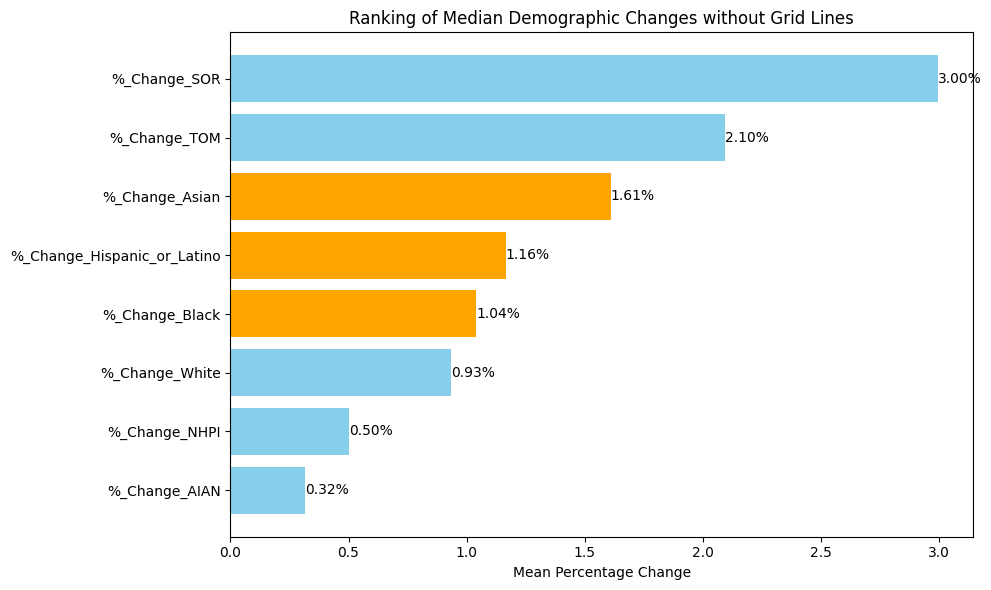

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded CSV file
file_path = '/content/modified_file.csv'
df = pd.read_csv(file_path)

# Columns to analyze for median change
columns_of_interest = [
    '%_Change_White',
    '%_Change_Black',
    '%_Change_Hispanic_or_Latino',
    '%_Change_Asian',
    '%_Change_AIAN',
    '%_Change_NHPI',
    '%_Change_SOR',
    '%_Change_TOM'
]

# Convert columns of interest to numeric, coercing errors to NaN
for column in columns_of_interest:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Calculate the mean change for the specified columns
mean_changes = df[columns_of_interest].mean().sort_values()

# Plotting without grid lines and adding value labels
plt.figure(figsize=(10, 6))

# Assign different colors for specific groups
colors = mean_changes.index.map(lambda x: 'orange' if x in ('%_Change_Black', '%_Change_Hispanic_or_Latino', '%_Change_Asian') else 'skyblue')

bars = plt.barh(mean_changes.index, mean_changes.values, color=colors)

# Remove grid lines
plt.grid(False)

# Add the value of change at the end of each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}%',
             va='center', ha='left')

plt.xlabel('Mean Percentage Change')
plt.title('Ranking of Median Demographic Changes without Grid Lines')
plt.tight_layout()
plt.show()


# **2020 Race and Ethnic Distribution**

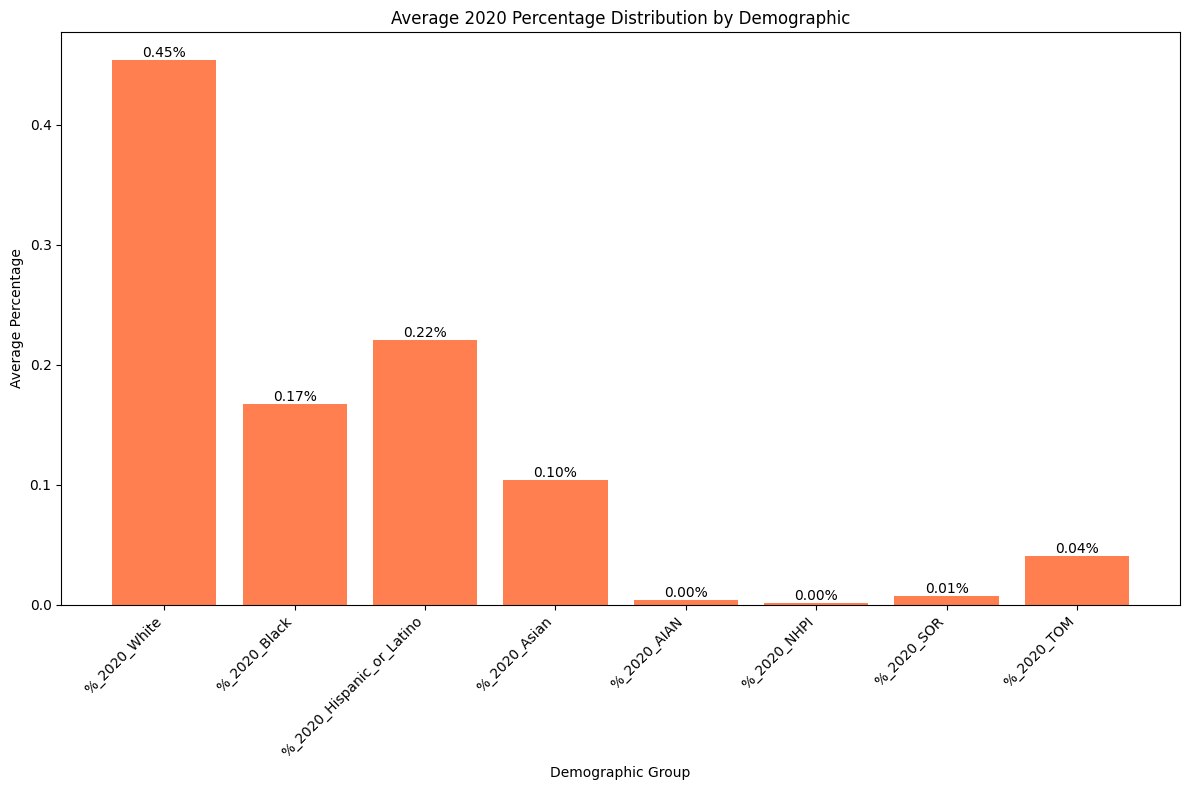

In [ ]:
# Columns for the new bar chart are from 12 through 19
columns_for_new_chart = [
    '%_2020_White',
    '%_2020_Black',
    '%_2020_Hispanic_or_Latino',
    '%_2020_Asian',
    '%_2020_AIAN',
    '%_2020_NHPI',
    '%_2020_SOR',
    '%_2020_TOM'
]

totals_for_new_chart = data[columns_for_new_chart].mean()  # Using mean here to represent average percentage across all facilities

# Creating the bar chart for these columns
plt.figure(figsize=(12, 8))  # Adjusted for a larger, more readable plot
bars = plt.bar(totals_for_new_chart.index, totals_for_new_chart.values, color='coral')

# Add value labels above each bar for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', va='bottom', ha='center')

plt.xlabel('Demographic Group')
plt.ylabel('Average Percentage')
plt.title('Average 2020 Percentage Distribution by Demographic')
plt.xticks(rotation=45, ha='right')  # Rotate labels to avoid overlap

plt.grid(False)  # Remove grid lines for a cleaner look
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


# **Highly Segregated Station Area Analysis**

# **Stations Over 90% Homogenous: 2020**

In [ ]:
# Calculate the percentage of rows for each specified demographic group where the population is 0.9 or higher

# Filtering the dataset for each condition separately
filtered_rows_white = data[data['%_2020_White'] >= 0.9]
filtered_rows_black = data[data['%_2020_Black'] >= 0.9]
filtered_rows_hispanic_latino = data[data['%_2020_Hispanic_or_Latino'] >= 0.9]
filtered_rows_asian = data[data['%_2020_Asian'] >= 0.9]

# Calculating the percentage of rows that meet each condition out of the total
percentage_rows_white = (len(filtered_rows_white) / len(df)) * 100
percentage_rows_black = (len(filtered_rows_black) / len(df)) * 100
percentage_rows_hispanic_latino = (len(filtered_rows_hispanic_latino) / len(df)) * 100
percentage_rows_asian = (len(filtered_rows_asian) / len(df)) * 100

# Displaying the results
print(f"Percentage of rows with '%_2020_White' >= 0.9: {percentage_rows_white:.2f}%")
print(f"Percentage of rows with '%_2020_Black' >= 0.9: {percentage_rows_black:.2f}%")
print(f"Percentage of rows with '%_2020_Hispanic_or_Latino' >= 0.9: {percentage_rows_hispanic_latino:.2f}%")
print(f"Percentage of rows with '%_2020_Asian' >= 0.9: {percentage_rows_asian:.2f}%")


Percentage of rows with '%_2020_White' >= 0.9: 1.88%
Percentage of rows with '%_2020_Black' >= 0.9: 1.50%
Percentage of rows with '%_2020_Hispanic_or_Latino' >= 0.9: 1.42%
Percentage of rows with '%_2020_Asian' >= 0.9: 0.00%


# **Stations 80% Homogenous 2020**

In [ ]:
# Calculate the percentage of rows for each specified demographic group where the population is 0.9 or higher

# Filtering the dataset for each condition separately
filtered_rows_white = data[data['%_2020_White'] >= 0.8]
filtered_rows_black = data[data['%_2020_Black'] >= 0.8]
filtered_rows_hispanic_latino = data[data['%_2020_Hispanic_or_Latino'] >= 0.8]
filtered_rows_asian = data[data['%_2020_Asian'] >= 0.8]

# Calculating the percentage of rows that meet each condition out of the total
percentage_rows_white = (len(filtered_rows_white) / len(df)) * 100
percentage_rows_black = (len(filtered_rows_black) / len(df)) * 100
percentage_rows_hispanic_latino = (len(filtered_rows_hispanic_latino) / len(df)) * 100
percentage_rows_asian = (len(filtered_rows_asian) / len(df)) * 100

# Displaying the results
print(f"Percentage of rows with '%_2020_White' >= 0.8: {percentage_rows_white:.2f}%")
print(f"Percentage of rows with '%_2020_Black' >= 0.8: {percentage_rows_black:.2f}%")
print(f"Percentage of rows with '%_2020_Hispanic_or_Latino' >= 0.8: {percentage_rows_hispanic_latino:.2f}%")
print(f"Percentage of rows with '%_2020_Asian' >= 0.8: {percentage_rows_asian:.2f}%")


Percentage of rows with '%_2020_White' >= 0.8: 9.83%
Percentage of rows with '%_2020_Black' >= 0.8: 3.67%
Percentage of rows with '%_2020_Hispanic_or_Latino' >= 0.8: 3.05%
Percentage of rows with '%_2020_Asian' >= 0.8: 0.08%


# **Stations 90% Homogenous 2010**

In [ ]:
# Calculate the percentage of rows for each specified demographic group where the population is 0.9 or higher

# Filtering the dataset for each condition separately
filtered_rows_white = data[data['%_2010_White'] >= 0.9]
filtered_rows_black = data[data['%_2010_Black'] >= 0.9]
filtered_rows_hispanic_latino = data[data['%_2010_Hispanic_or_Latino'] >= 0.9]
filtered_rows_asian = data[data['%_2010_Asian'] >= 0.9]

# Calculating the percentage of rows that meet each condition out of the total
percentage_rows_white = (len(filtered_rows_white) / len(df)) * 100
percentage_rows_black = (len(filtered_rows_black) / len(df)) * 100
percentage_rows_hispanic_latino = (len(filtered_rows_hispanic_latino) / len(df)) * 100
percentage_rows_asian = (len(filtered_rows_asian) / len(df)) * 100

# Displaying the results
print(f"Percentage of rows with '%_2010_White' >= 0.9: {percentage_rows_white:.2f}%")
print(f"Percentage of rows with '%_2010_Black' >= 0.9: {percentage_rows_black:.2f}%")
print(f"Percentage of rows with '%_2010_Hispanic_or_Latino' >= 0.9: {percentage_rows_hispanic_latino:.2f}%")
print(f"Percentage of rows with '%_2010_Asian' >= 0.9: {percentage_rows_asian:.2f}%")


Percentage of rows with '%_2010_White' >= 0.9: 6.65%
Percentage of rows with '%_2010_Black' >= 0.9: 2.87%
Percentage of rows with '%_2010_Hispanic_or_Latino' >= 0.9: 1.55%
Percentage of rows with '%_2010_Asian' >= 0.9: 0.00%


# **Stations 80% Homogenous 2010**

In [ ]:
# Calculate the percentage of rows for each specified demographic group where the population is 0.9 or higher

# Filtering the dataset for each condition separately
filtered_rows_white = data[data['%_2010_White'] >= 0.8]
filtered_rows_black = data[data['%_2010_Black'] >= 0.8]
filtered_rows_hispanic_latino = data[data['%_2010_Hispanic_or_Latino'] >= 0.8]
filtered_rows_asian = data[data['%_2010_Asian'] >= 0.8]

# Calculating the percentage of rows that meet each condition out of the total
percentage_rows_white = (len(filtered_rows_white) / len(df)) * 100
percentage_rows_black = (len(filtered_rows_black) / len(df)) * 100
percentage_rows_hispanic_latino = (len(filtered_rows_hispanic_latino) / len(df)) * 100
percentage_rows_asian = (len(filtered_rows_asian) / len(df)) * 100

# Displaying the results
print(f"Percentage of rows with '%_2010_White' >= 0.8: {percentage_rows_white:.2f}%")
print(f"Percentage of rows with '%_2010_Black' >= 0.8: {percentage_rows_black:.2f}%")
print(f"Percentage of rows with '%_2010_Hispanic_or_Latino' >= 0.8: {percentage_rows_hispanic_latino:.2f}%")
print(f"Percentage of rows with '%_2010_Asian' >= 0.8: {percentage_rows_asian:.2f}%")


Percentage of rows with '%_2010_White' >= 0.8: 19.37%
Percentage of rows with '%_2010_Black' >= 0.8: 4.90%
Percentage of rows with '%_2010_Hispanic_or_Latino' >= 0.8: 3.67%
Percentage of rows with '%_2010_Asian' >= 0.8: 0.13%


# **Number of Stations where No One Race/Ethnicity is a Majority**

In [ ]:
# Analyze the data to identify the number of stations in 2020 where no one race or ethnicity exceeded 0.5 (50%)

# Filter the dataset for stations where no single race or ethnicity exceeds 0.5
stations_no_dominant_race = data[
    (data['%_2020_White'] <= 0.5) &
    (data['%_2020_Black'] <= 0.5) &
    (data['%_2020_Hispanic_or_Latino'] <= 0.5) &
    (data['%_2020_Asian'] <= 0.5)
]

# Calculate the number of such stations
number_of_stations = len(stations_no_dominant_race)

number_of_stations


1028

In [ ]:
# Analyze the data to identify the number of stations in 2020 where no one race or ethnicity exceeded 0.5 (50%)

# Filter the dataset for stations where no single race or ethnicity exceeds 0.5
stations_no_dominant_race = data[
    (data['%_2010_White'] <= 0.5) &
    (data['%_2010_Black'] <= 0.5) &
    (data['%_2010_Hispanic_or_Latino'] <= 0.5) &
    (data['%_2010_Asian'] <= 0.5)
]

# Calculate the number of such stations
number_of_stations = len(stations_no_dominant_race)

number_of_stations


734

# **Correlations Between Race and Ethnicity and Selected Characteristics of Station Areas**

In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('/content/RE_Correlations_systems_REVISED.csv')

# Replace '#DIV/0!' with NaN
df.replace('#DIV/0!', pd.NA, inplace=True)

# Save the cleaned data if you want to use it later
df.to_csv('path_to_cleaned_file.csv', index=False)


In [ ]:
# Convert all columns of type 'object' to 'float'
for col in df.columns:
    if df[col].dtype == object:
        try:
            df[col] = pd.to_numeric(data[col], errors='coerce')
        except ValueError:
            pass  # This column cannot be converted to float

data.to_csv('modified_file.csv', index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 62 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Facility ID                  3732 non-null   int64  
 1   Facility Name                0 non-null      float64
 2   Transit Agency Name          0 non-null      float64
 3   TOD Score                    3732 non-null   float64
 4   Walk Score                   3732 non-null   int64  
 5   Amenities                    3732 non-null   int64  
 6   Designated Land Use          3732 non-null   int64  
 7   Housing Change               3732 non-null   float64
 8   2020_Median_Home_Value       3732 non-null   int64  
 9   2020_Median_Rent             3732 non-null   int64  
 10  %_HV_Change                  3732 non-null   float64
 11  %_R_Change                   3732 non-null   float64
 12  Near_Highway                 3732 non-null   int64  
 13  % Natural Features

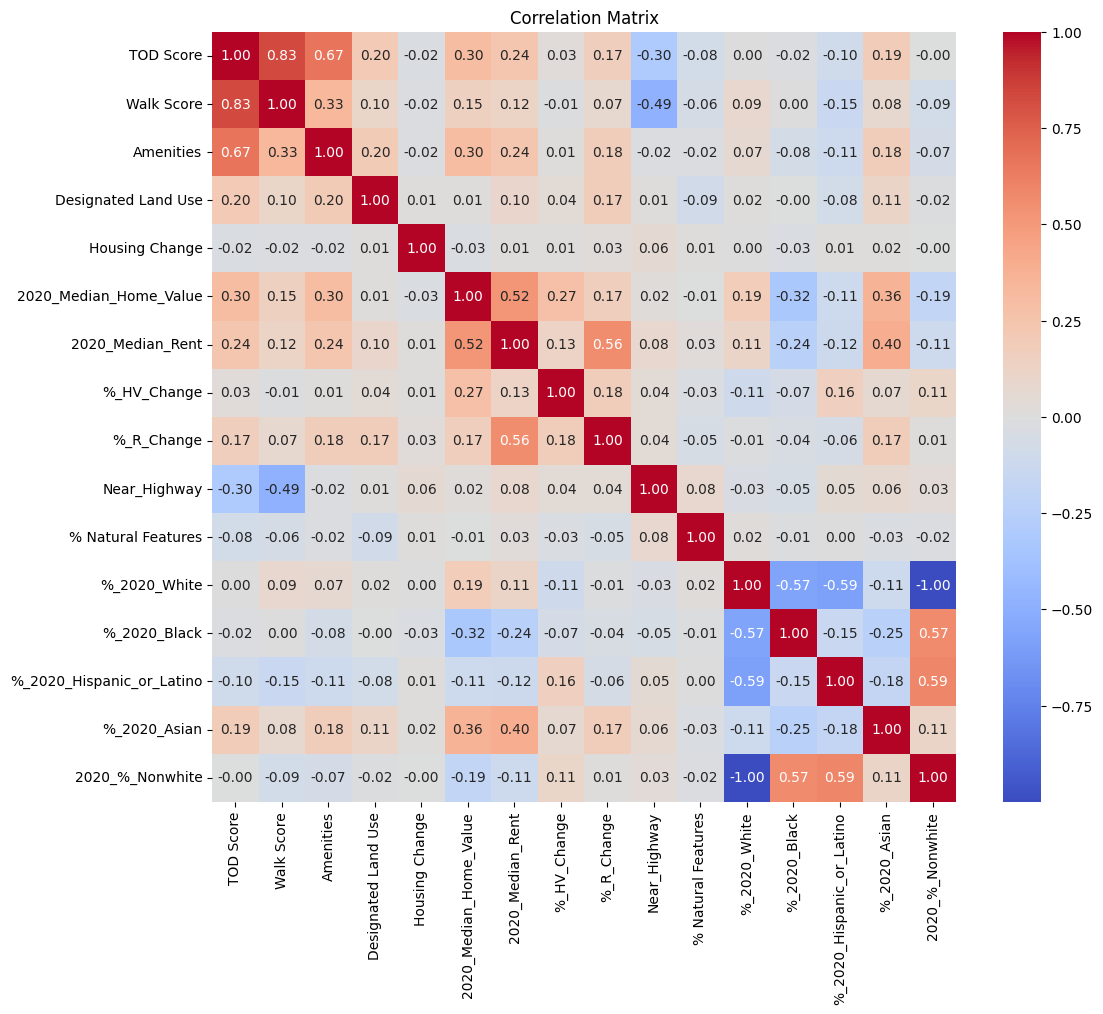

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/modified_file.csv')

# List of target variables
target_variables = [
    "TOD Score", "Walk Score", "Amenities", "Designated Land Use",
    "Housing Change", "2020_Median_Home_Value", "2020_Median_Rent",
    "%_HV_Change", "%_R_Change", "Near_Highway", "% Natural Features"
]

# List of independent variables
independent_variables = [
    "%_2020_White", "%_2020_Black", "%_2020_Hispanic_or_Latino",
    "%_2020_Asian", "2020_%_Nonwhite"
]

# Combine the lists to select from the DataFrame
columns_to_select = target_variables + independent_variables

# Select only the relevant columns for the correlation matrix
df_selected = df[columns_to_select]

# Compute the correlation matrix
correlation_matrix = df_selected.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


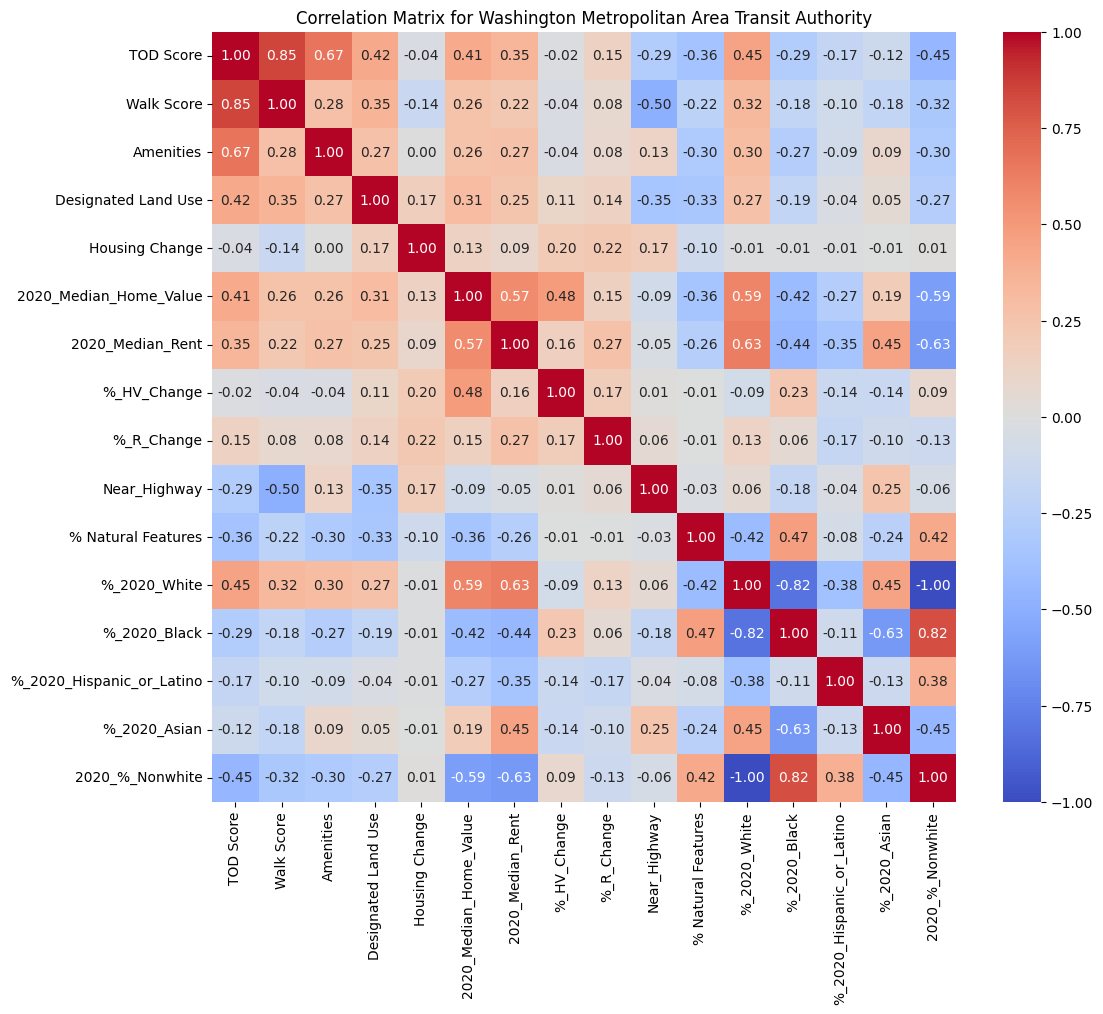

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/modified_fileV2_systems.csv')

# Filter the DataFrame for rows where "Transit Agency Name" is "Washington Metropolitan Area Transit Authority"
df_filtered = df.loc[df['Transit Agency Name'] == "Washington Metropolitan Area Transit Authority"]

# List of target variables
target_variables = [
    "TOD Score", "Walk Score", "Amenities", "Designated Land Use",
    "Housing Change", "2020_Median_Home_Value", "2020_Median_Rent",
    "%_HV_Change", "%_R_Change", "Near_Highway", "% Natural Features"
]

# List of independent variables
independent_variables = [
    "%_2020_White", "%_2020_Black", "%_2020_Hispanic_or_Latino",
    "%_2020_Asian", "2020_%_Nonwhite"
]

# Combine the lists to select from the DataFrame
columns_to_select = target_variables + independent_variables

# Select only the relevant columns for the correlation matrix from the filtered DataFrame
df_selected = df_filtered[columns_to_select]

# Compute the correlation matrix
correlation_matrix = df_selected.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Washington Metropolitan Area Transit Authority')
plt.show()


Please enter the name of the transit agency: Chicago Transit Authority


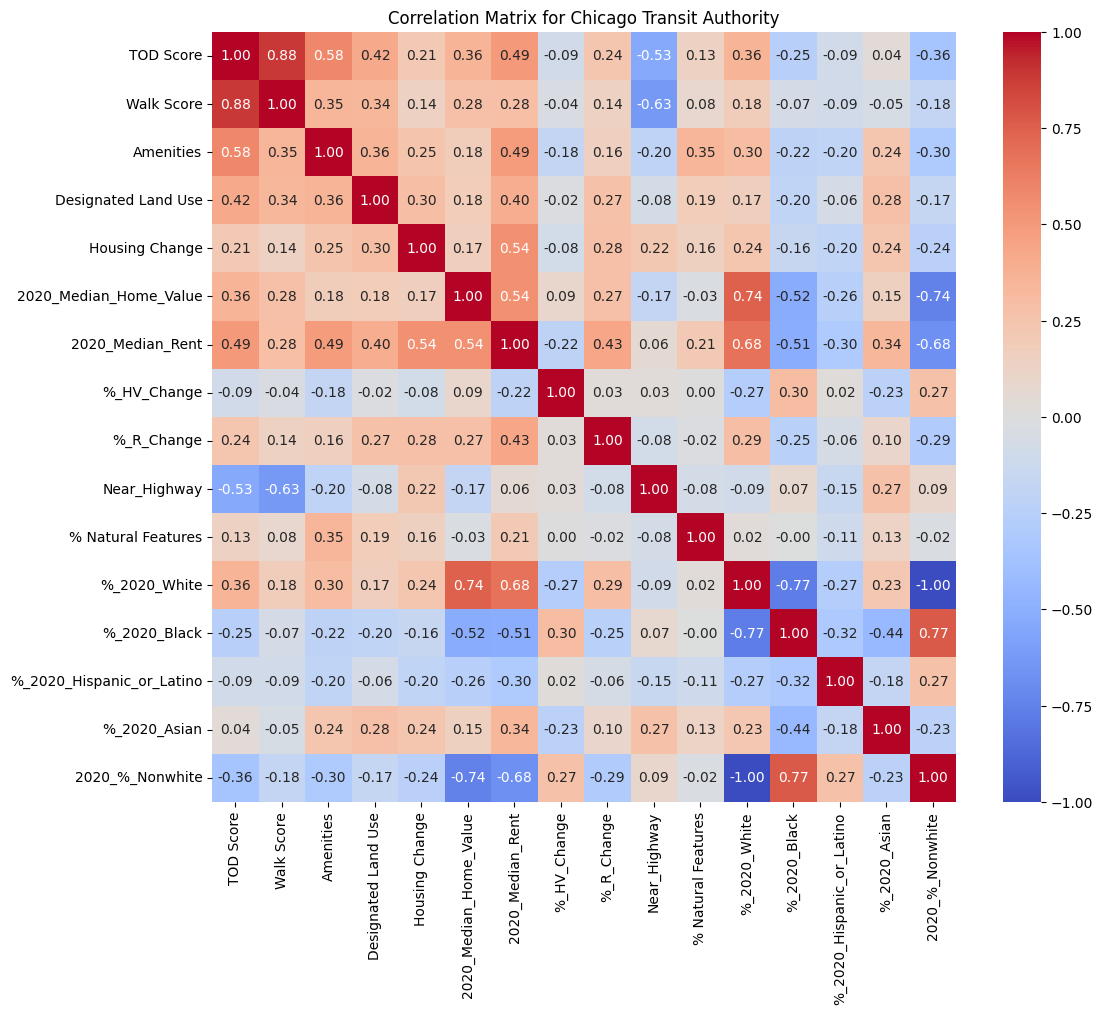

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prompt the user to enter the name of the transit agency
agency_name = input("Please enter the name of the transit agency: ")

# Load the dataset
df = pd.read_csv('/content/modified_fileV2_systems.csv')

# Filter the DataFrame for rows where "Transit Agency Name" matches the user's input
df_filtered = df.loc[df['Transit Agency Name'] == agency_name]

# List of target variables
target_variables = [
    "TOD Score", "Walk Score", "Amenities", "Designated Land Use",
    "Housing Change", "2020_Median_Home_Value", "2020_Median_Rent",
    "%_HV_Change", "%_R_Change", "Near_Highway", "% Natural Features"
]

# List of independent variables
independent_variables = [
    "%_2020_White", "%_2020_Black", "%_2020_Hispanic_or_Latino",
    "%_2020_Asian", "2020_%_Nonwhite"
]

# Combine the lists to select from the DataFrame
columns_to_select = target_variables + independent_variables

# Select only the relevant columns for the correlation matrix from the filtered DataFrame
df_selected = df_filtered[columns_to_select]

# Compute the correlation matrix
correlation_matrix = df_selected.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Correlation Matrix for {agency_name}')
plt.show()


# **Race, Ethnicity, and System Characteristics**

In [ ]:
import pandas as pd
df=pd.read_csv('/content/modified_fileV2_systems_independents.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 66 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Facility ID                  3732 non-null   int64  
 1   Facility Name                3732 non-null   object 
 2   Transit Agency Name          3732 non-null   object 
 3   Primary Mode                 3732 non-null   object 
 4   Cluster                      3732 non-null   object 
 5   System                       3732 non-null   object 
 6   Decade Built                 3732 non-null   object 
 7   TOD Score                    3732 non-null   float64
 8   Walk Score                   3732 non-null   int64  
 9   Amenities                    3732 non-null   int64  
 10  Designated Land Use          3732 non-null   int64  
 11  Housing Change               3732 non-null   float64
 12  2020_Median_Home_Value       3732 non-null   int64  
 13  2020_Median_Rent  

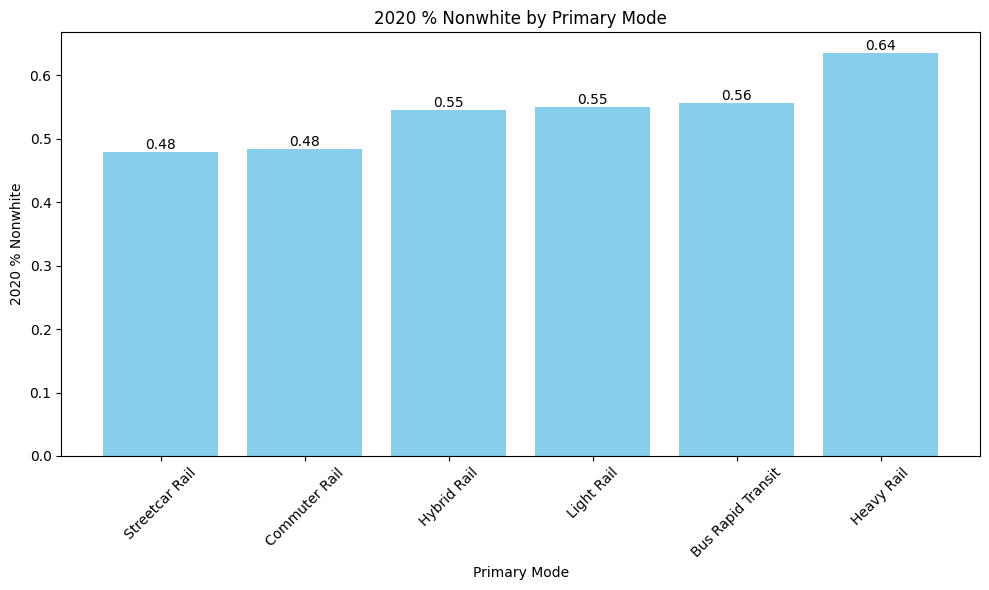

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Calculate the mean of "2020_%_Nonwhite" for each category in "Primary Mode"
mean_nonwhite_by_mode = df.groupby('Primary Mode')['2020_%_Nonwhite'].mean().reset_index()

# Sorting values by "2020_%_Nonwhite" for better visualization
mean_nonwhite_by_mode = mean_nonwhite_by_mode.sort_values('2020_%_Nonwhite')

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(mean_nonwhite_by_mode['Primary Mode'], mean_nonwhite_by_mode['2020_%_Nonwhite'], color='skyblue')

plt.xlabel('Primary Mode')
plt.ylabel('2020 % Nonwhite')
plt.title('2020 % Nonwhite by Primary Mode')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Adding the value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()  # Adjust the layout to make room for the label
plt.show()


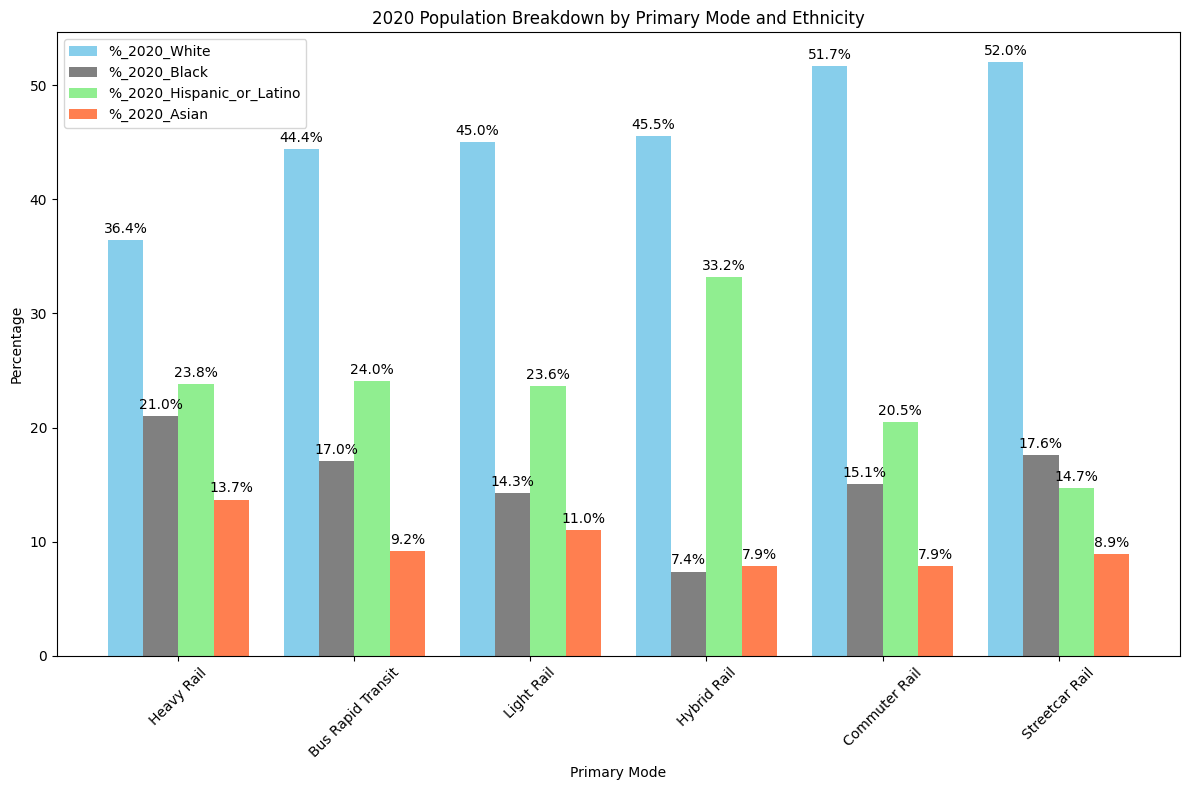

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame

# Pivot the DataFrame to get the subcategories as separate columns
pivot_df = df.pivot_table(index='Primary Mode', values=['%_2020_White', '%_2020_Black', '%_2020_Hispanic_or_Latino', '%_2020_Asian'], aggfunc=np.mean)

# Sorting the pivot table for better visualization
pivot_df = pivot_df.sort_values('%_2020_White')

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Setting the positions and width for the bars
positions = np.arange(len(pivot_df))
bar_width = 0.2

# Categories
categories = ['%_2020_White', '%_2020_Black', '%_2020_Hispanic_or_Latino', '%_2020_Asian']
colors = ['skyblue', 'grey', 'lightgreen', 'coral']

for i, (category, color) in enumerate(zip(categories, colors)):
    # Position for each category
    pos = positions + (i - len(categories)/2) * bar_width + bar_width/2
    bars = ax.bar(pos, pivot_df[category]*100, width=bar_width, label=category, color=color)  # Multiply by 100 if necessary

    # Add text on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',  # Adjust format here if necessary
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Adding labels, title, and legend
ax.set_xlabel('Primary Mode')
ax.set_ylabel('Percentage')
ax.set_title('2020 Population Breakdown by Primary Mode and Ethnicity')
ax.set_xticks(positions)
ax.set_xticklabels(pivot_df.index, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


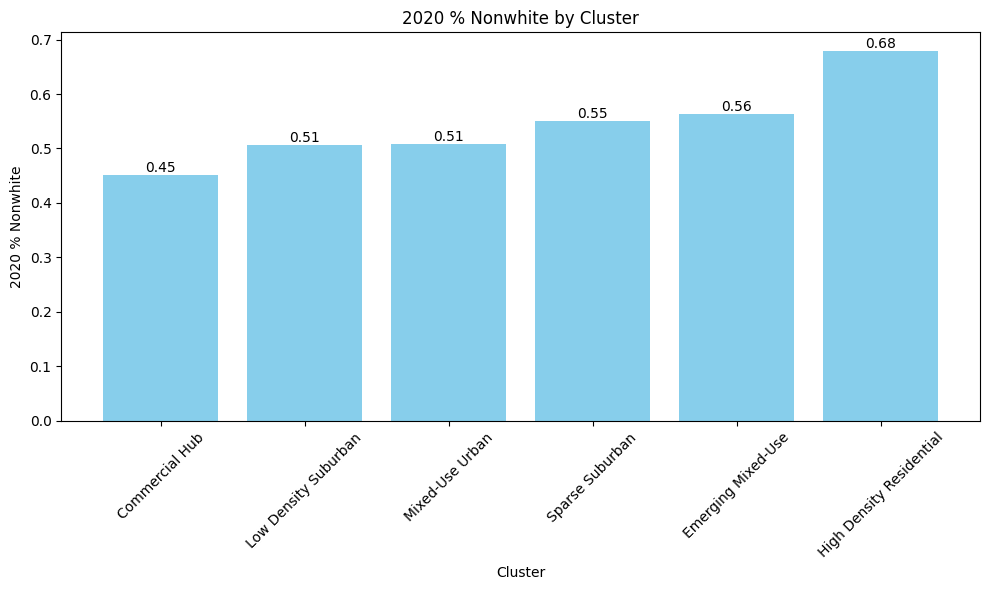

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Calculate the mean of "2020_%_Nonwhite" for each category in "Primary Mode"
mean_nonwhite_by_mode = df.groupby('Cluster')['2020_%_Nonwhite'].mean().reset_index()

# Sorting values by "2020_%_Nonwhite" for better visualization
mean_nonwhite_by_mode = mean_nonwhite_by_mode.sort_values('2020_%_Nonwhite')

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(mean_nonwhite_by_mode['Cluster'], mean_nonwhite_by_mode['2020_%_Nonwhite'], color='skyblue')

plt.xlabel('Cluster')
plt.ylabel('2020 % Nonwhite')
plt.title('2020 % Nonwhite by Cluster')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Adding the value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()  # Adjust the layout to make room for the label
plt.show()


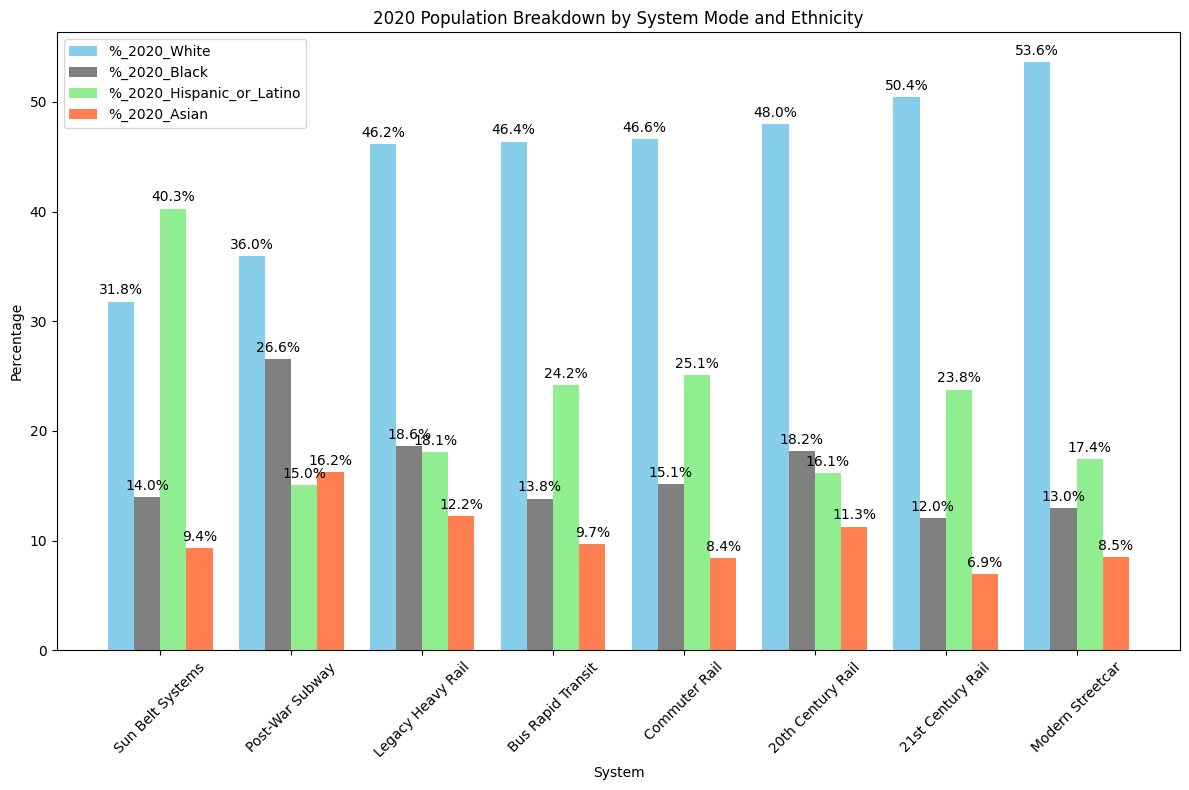

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame

# Pivot the DataFrame to get the subcategories as separate columns
pivot_df = df.pivot_table(index='System', values=['%_2020_White', '%_2020_Black', '%_2020_Hispanic_or_Latino', '%_2020_Asian'], aggfunc=np.mean)

# Sorting the pivot table for better visualization
pivot_df = pivot_df.sort_values('%_2020_White')

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Setting the positions and width for the bars
positions = np.arange(len(pivot_df))
bar_width = 0.2

# Categories
categories = ['%_2020_White', '%_2020_Black', '%_2020_Hispanic_or_Latino', '%_2020_Asian']
colors = ['skyblue', 'grey', 'lightgreen', 'coral']

for i, (category, color) in enumerate(zip(categories, colors)):
    # Position for each category
    pos = positions + (i - len(categories)/2) * bar_width + bar_width/2
    bars = ax.bar(pos, pivot_df[category]*100, width=bar_width, label=category, color=color)  # Multiply by 100 if necessary

    # Add text on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',  # Adjust format here if necessary
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Adding labels, title, and legend
ax.set_xlabel('System')
ax.set_ylabel('Percentage')
ax.set_title('2020 Population Breakdown by System Mode and Ethnicity')
ax.set_xticks(positions)
ax.set_xticklabels(pivot_df.index, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


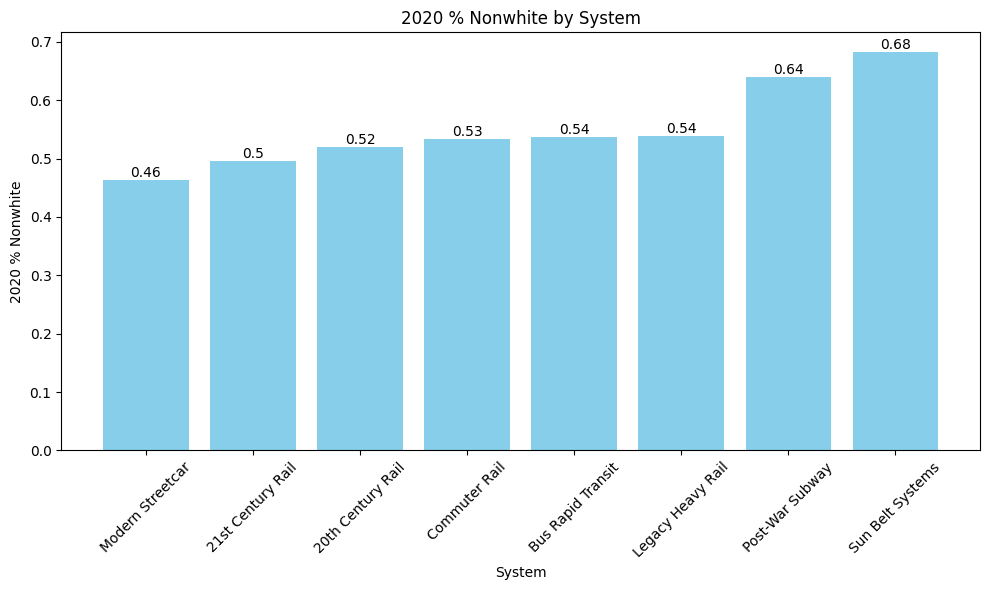

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Calculate the mean of "2020_%_Nonwhite" for each category in "Primary Mode"
mean_nonwhite_by_mode = df.groupby('System')['2020_%_Nonwhite'].mean().reset_index()

# Sorting values by "2020_%_Nonwhite" for better visualization
mean_nonwhite_by_mode = mean_nonwhite_by_mode.sort_values('2020_%_Nonwhite')

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(mean_nonwhite_by_mode['System'], mean_nonwhite_by_mode['2020_%_Nonwhite'], color='skyblue')

plt.xlabel('System')
plt.ylabel('2020 % Nonwhite')
plt.title('2020 % Nonwhite by System')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Adding the value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()  # Adjust the layout to make room for the label
plt.show()


# **Gentrification Index**

In [ ]:
import pandas as pd

# Load the file
file_path = '/content/modified_fileV2_systems_independents.csv'  # Adjust this to your actual file path
data = pd.read_csv(file_path)

# Filter the data where '2020_Total_Population' is 100 or greater and both '%_HV_Change' and '%_R_Change' are positive
data = data[(data['2020_Total_Population'] >= 100) & (data['%_HV_Change'] > 0) & (data['%_R_Change'] > 0)]

# Rank each of the three scores (lower rank means higher score).
data['Demographic Change Rank'] = data['White_v_Nonwhite_Change'].rank(ascending=False)
data['Home Value Rank'] = data['%_HV_Change'].rank(ascending=False)
data['Rent Price Rank'] = data['%_R_Change'].rank(ascending=False)

# Compute a composite score by summing the ranks. Lower composite score means higher overall ranking.
data['Composite Rank'] = data['Demographic Change Rank'] + data['Home Value Rank'] + data['Rent Price Rank']

# Select the top 100 facilities based on the composite rank.
top_100_facilities = data.nsmallest(100, 'Composite Rank')

# Save the filtered data to a new CSV file.
output_file_path = 'Gentrification Scores.csv'  # Adjust this to your desired output file path
top_100_facilities.to_csv(output_file_path, index=False)

print(f"The top 100 facilities file has been saved to: {output_file_path}")


The top 100 facilities file has been saved to: Gentrification Scores.csv


# **Home Value Modeling with Demographic Information**

In [ ]:
import pandas as pd
data=pd.read_csv('/content/For_Regression_home_rent_RE.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Facility ID                  2907 non-null   int64  
 1   %_2020_White                 2869 non-null   float64
 2   %_2020_Black                 2869 non-null   float64
 3   %_2020_Hispanic_or_Latino    2869 non-null   float64
 4   %_2020_Asian                 2869 non-null   float64
 5   %_Change_White               2869 non-null   float64
 6   %_Change_Black               2869 non-null   float64
 7   %_Change_Hispanic_or_Latino  2869 non-null   float64
 8   %_Change_Asian               2869 non-null   float64
 9   2020 Median Home Value       2803 non-null   float64
 10  2010 Median Home Value       2881 non-null   float64
 11  % HV Change                  2798 non-null   float64
 12  % HV Change.1                2856 non-null   float64
 13  2020 Median Rent  

# **Linear Regression with Demographic Data Included**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('/content/For_Regression_home_rent_REv2..csv')

# Prepare the features and target variable, excluding the specified columns
X = data.drop(['Facility ID', '2020 Median Home Value'], axis=1)
y = data['2020 Median Home Value']

# Identify categorical columns for one-hot encoding
categorical_cols = ['Presence of Highway', 'Cluster Name', 'Primary Mode Served', 'Facility Type', 'Mode_Type', 'System', 'Decade Built', 'Station Proximity']

# OneHotEncoder instance to transform categorical variables
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_cols])

# Create a new DataFrame from the encoded variables
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Combine the encoded DataFrame with the original data (excluding targets and categorical columns)
X_preprocessed = pd.concat([X.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Fill missing values for numerical features with their median
X_preprocessed = X_preprocessed.fillna(X_preprocessed.median())

# Removing rows with missing values in the target variable '2020 Median Home Value'
data_cleaned = data.dropna(subset=['2020 Median Home Value'])
y_cleaned = data_cleaned['2020 Median Home Value']
X_cleaned = X_preprocessed.loc[data_cleaned.index, :]

# Split the data into training and testing sets, including unscaled y_test_cleaned for evaluation
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Standardize the target variable (for training set)
scaler_y = StandardScaler()
y_train_cleaned_scaled = scaler_y.fit_transform(y_train_cleaned.values.reshape(-1, 1)).flatten()

# Standardize the target variable for the test set based on the scaler fitted on the training set
y_test_cleaned_scaled = scaler_y.transform(y_test_cleaned.values.reshape(-1, 1)).flatten()

# Initialize and fit the Linear Regression model on the scaled target
lin_reg_cleaned = LinearRegression()
lin_reg_cleaned.fit(X_train_cleaned, y_train_cleaned_scaled)

# Make predictions on the scaled target
y_pred_cleaned_scaled = lin_reg_cleaned.predict(X_test_cleaned)

# Evaluate the model on the scaled target
r2_cleaned_scaled = r2_score(y_test_cleaned_scaled, y_pred_cleaned_scaled)
mse_cleaned_scaled = mean_squared_error(y_test_cleaned_scaled, y_pred_cleaned_scaled)

# Inverse transform the predictions to get them back on the original scale for interpretability
y_pred_cleaned = scaler_y.inverse_transform(y_pred_cleaned_scaled.reshape(-1, 1)).flatten()

# Evaluate the inverse-transformed predictions
r2_cleaned = r2_score(y_test_cleaned, y_pred_cleaned)
mse_cleaned = mean_squared_error(y_test_cleaned, y_pred_cleaned)

print(f'R-squared score (scaled): {r2_cleaned_scaled}')
print(f'Mean Squared Error (scaled): {mse_cleaned_scaled}')



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R-squared score (scaled): 0.4199594182899017
Mean Squared Error (scaled): 0.6392306514462671


# **Random Forest Model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('/content/For_Regression_home_rent_REv2..csv')

# Prepare the features and target variable, excluding the specified columns
X = data.drop(['Facility ID', '2020 Median Home Value'], axis=1)
y = data['2020 Median Home Value']

# Identify categorical columns for one-hot encoding
categorical_cols = ['Presence of Highway', 'Cluster Name', 'Primary Mode Served', 'Facility Type', 'Mode_Type', 'System', 'Decade Built', 'Station Proximity']

# OneHotEncoder instance to transform categorical variables
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_cols])

# Create a new DataFrame from the encoded variables
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Combine the encoded DataFrame with the original data (excluding targets and categorical columns)
X_preprocessed = pd.concat([X.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Fill missing values for numerical features with their median
X_preprocessed = X_preprocessed.fillna(X_preprocessed.median())

# Removing rows with missing values in the target variable '2020 Median Home Value'
data_cleaned = data.dropna(subset=['2020 Median Home Value'])
y_cleaned = data_cleaned['2020 Median Home Value']
X_cleaned = X_preprocessed.loc[data_cleaned.index, :]

# Split the data into training and testing sets, including unscaled y_test_cleaned for evaluation
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Standardize the target variable (for training set)
scaler_y = StandardScaler()
y_train_cleaned_scaled = scaler_y.fit_transform(y_train_cleaned.values.reshape(-1, 1)).flatten()

# Standardize the target variable for the test set based on the scaler fitted on the training set
y_test_cleaned_scaled = scaler_y.transform(y_test_cleaned.values.reshape(-1, 1)).flatten()

# Initialize and fit the Random Forest Regression model on the scaled target
rf_reg_cleaned = RandomForestRegressor(random_state=42)
rf_reg_cleaned.fit(X_train_cleaned, y_train_cleaned_scaled)

# Make predictions on the scaled target
y_pred_cleaned_scaled = rf_reg_cleaned.predict(X_test_cleaned)

# Evaluate the model on the scaled target
r2_cleaned_scaled_rf = r2_score(y_test_cleaned_scaled, y_pred_cleaned_scaled)
mse_cleaned_scaled_rf = mean_squared_error(y_test_cleaned_scaled, y_pred_cleaned_scaled)

# Inverse transform the predictions to get them back on the original scale for interpretability
y_pred_cleaned_rf = scaler_y.inverse_transform(y_pred_cleaned_scaled.reshape(-1, 1)).flatten()

# Evaluate the inverse-transformed predictions
r2_cleaned_rf = r2_score(y_test_cleaned, y_pred_cleaned_rf)
mse_cleaned_rf = mean_squared_error(y_test_cleaned, y_pred_cleaned_rf)

print(f'R-squared score (scaled) with Random Forest: {r2_cleaned_scaled_rf}')
print(f'Mean Squared Error (scaled) with Random Forest: {mse_cleaned_scaled_rf}')



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R-squared score (scaled) with Random Forest: 0.5889140319941591
Mean Squared Error (scaled) with Random Forest: 0.4530351141191852


# **Identify Number of Features**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('/content/For_Regression_home_rent_REv2..csv')

# Prepare the features and target variable, excluding the specified columns
X = data.drop(['Facility ID', '2020 Median Home Value'], axis=1)
y = data['2020 Median Home Value']

# Identify categorical columns for one-hot encoding
categorical_cols = ['Presence of Highway', 'Cluster Name', 'Primary Mode Served', 'Facility Type', 'Mode_Type', 'System', 'Decade Built', 'Station Proximity']

# OneHotEncoder instance to transform categorical variables
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_cols])

# Create a new DataFrame from the encoded variables
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Combine the encoded DataFrame with the original data (excluding targets and categorical columns)
X_preprocessed = pd.concat([X.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Fill missing values for numerical features with their median
X_preprocessed = X_preprocessed.fillna(X_preprocessed.median())

# Removing rows with missing values in the target variable '2020 Median Home Value'
data_cleaned = data.dropna(subset=['2020 Median Home Value'])
y_cleaned = data_cleaned['2020 Median Home Value']
X_cleaned = X_preprocessed.loc[data_cleaned.index, :]

# Split the data into training and testing sets, including unscaled y_test_cleaned for evaluation
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Standardize the target variable (for training set)
scaler_y = StandardScaler()
y_train_cleaned_scaled = scaler_y.fit_transform(y_train_cleaned.values.reshape(-1, 1)).flatten()

# Standardize the target variable for the test set based on the scaler fitted on the training set
y_test_cleaned_scaled = scaler_y.transform(y_test_cleaned.values.reshape(-1, 1)).flatten()

# Initialize and fit the Random Forest Regression model on the scaled target
rf_reg_cleaned = RandomForestRegressor(random_state=42)
rf_reg_cleaned.fit(X_train_cleaned, y_train_cleaned_scaled)

# Make predictions on the scaled target
y_pred_cleaned_scaled = rf_reg_cleaned.predict(X_test_cleaned)

# Evaluate the model on the scaled target
r2_cleaned_scaled_rf = r2_score(y_test_cleaned_scaled, y_pred_cleaned_scaled)
mse_cleaned_scaled_rf = mean_squared_error(y_test_cleaned_scaled, y_pred_cleaned_scaled)

# Inverse transform the predictions to get them back on the original scale for interpretability
y_pred_cleaned_rf = scaler_y.inverse_transform(y_pred_cleaned_scaled.reshape(-1, 1)).flatten()

# Evaluate the inverse-transformed predictions
r2_cleaned_rf = r2_score(y_test_cleaned, y_pred_cleaned_rf)
mse_cleaned_rf = mean_squared_error(y_test_cleaned, y_pred_cleaned_rf)

# Print the number of features used in the model
print(f'Number of features used in the model: {X_cleaned.shape[1]}')

print(f'R-squared score (scaled) with Random Forest: {r2_cleaned_scaled_rf}')
print(f'Mean Squared Error (scaled) with Random Forest: {mse_cleaned_scaled_rf}')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Number of features used in the model: 83
R-squared score (scaled) with Random Forest: 0.5889140319941591
Mean Squared Error (scaled) with Random Forest: 0.4530351141191852


## **Train Test Valid**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('/content/For_Regression_home_rent_REv2..csv')

# Prepare the features and target variable, excluding the specified columns
X = data.drop(['Facility ID', '2020 Median Home Value'], axis=1)
y = data['2020 Median Home Value']

# Identify categorical columns for one-hot encoding
categorical_cols = ['Presence of Highway', 'Cluster Name', 'Primary Mode Served', 'Facility Type', 'Mode_Type', 'System', 'Decade Built', 'Station Proximity']

# OneHotEncoder instance to transform categorical variables
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_cols])

# Create a new DataFrame from the encoded variables
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Combine the encoded DataFrame with the original data (excluding targets and categorical columns)
X_preprocessed = pd.concat([X.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Fill missing values for numerical features with their median
X_preprocessed = X_preprocessed.fillna(X_preprocessed.median())

# Removing rows with missing values in the target variable '2020 Median Home Value'
data_cleaned = data.dropna(subset=['2020 Median Home Value'])
y_cleaned = data_cleaned['2020 Median Home Value']
X_cleaned = X_preprocessed.loc[data_cleaned.index, :]

# Split the data into training and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Standardize the target variable (for training set)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# Standardize the target variable for the validation and test sets based on the scaler fitted on the training set
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Initialize and fit the Random Forest Regression model on the scaled target
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train_scaled)

# Make predictions on the training, validation, and test sets
y_pred_train_scaled = rf_reg.predict(X_train)
y_pred_val_scaled = rf_reg.predict(X_val)
y_pred_test_scaled = rf_reg.predict(X_test)

# Evaluate the model on the scaled targets
r2_train_scaled = r2_score(y_train_scaled, y_pred_train_scaled)
r2_val_scaled = r2_score(y_val_scaled, y_pred_val_scaled)
r2_test_scaled = r2_score(y_test_scaled, y_pred_test_scaled)

# Print the R-squared scores
print(f'R-squared score (training set): {r2_train_scaled}')
print(f'R-squared score (validation set): {r2_val_scaled}')
print(f'R-squared score (test set): {r2_test_scaled}')

# Print the number of features used in the model
print(f'Number of features used in the model: {X_cleaned.shape[1]}')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R-squared score (training set): 0.9301504806582864
R-squared score (validation set): 0.4563488449043984
R-squared score (test set): 0.5528435889579921
Number of features used in the model: 83


# **Adjust for overfitting**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('/content/For_Regression_home_rent_REv2..csv')

# Prepare the features and target variable, excluding the specified columns
X = data.drop(['Facility ID', '2020 Median Home Value'], axis=1)
y = data['2020 Median Home Value']

# Identify categorical columns for one-hot encoding
categorical_cols = ['Presence of Highway', 'Cluster Name', 'Primary Mode Served', 'Facility Type', 'Mode_Type', 'System', 'Decade Built', 'Station Proximity']

# OneHotEncoder instance to transform categorical variables
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_cols])

# Create a new DataFrame from the encoded variables
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Combine the encoded DataFrame with the original data (excluding targets and categorical columns)
X_preprocessed = pd.concat([X.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Fill missing values for numerical features with their median
X_preprocessed = X_preprocessed.fillna(X_preprocessed.median())

# Removing rows with missing values in the target variable '2020 Median Home Value'
data_cleaned = data.dropna(subset=['2020 Median Home Value'])
y_cleaned = data_cleaned['2020 Median Home Value']
X_cleaned = X_preprocessed.loc[data_cleaned.index, :]

# Split the data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Standardize the target variable (for training set)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# Standardize the target variable for the validation and test sets
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Initialize and fit the Random Forest Regression model with adjusted hyperparameters
rf_reg = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42
)
rf_reg.fit(X_train, y_train_scaled)

# Make predictions on the training, validation, and test sets
y_pred_train_scaled = rf_reg.predict(X_train)
y_pred_val_scaled = rf_reg.predict(X_val)
y_pred_test_scaled = rf_reg.predict(X_test)

# Evaluate the model on the scaled targets
r2_train_scaled = r2_score(y_train_scaled, y_pred_train_scaled)
r2_val_scaled = r2_score(y_val_scaled, y_pred_val_scaled)
r2_test_scaled = r2_score(y_test_scaled, y_pred_test_scaled)

# Print the R-squared scores
print(f'R-squared score (training set): {r2_train_scaled}')
print(f'R-squared score (validation set): {r2_val_scaled}')
print(f'R-squared score (test set): {r2_test_scaled}')

# Print the number of features used in the model
print(f'Number of features used in the model: {X_cleaned.shape[1]}')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R-squared score (training set): 0.6413041772265033
R-squared score (validation set): 0.43507861305521645
R-squared score (test set): 0.4943573367812013
Number of features used in the model: 83


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('/content/For_Regression_home_rent_REv2..csv')

# Prepare the features and target variable, excluding the specified columns
X = data.drop(['Facility ID', '2020 Median Home Value'], axis=1)
y = data['2020 Median Home Value']

# Identify categorical columns for one-hot encoding
categorical_cols = ['Presence of Highway', 'Cluster Name', 'Primary Mode Served', 'Facility Type', 'Mode_Type', 'System', 'Decade Built', 'Station Proximity']

# OneHotEncoder instance to transform categorical variables
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_cols])

# Create a new DataFrame from the encoded variables
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Combine the encoded DataFrame with the original data (excluding targets and categorical columns)
X_preprocessed = pd.concat([X.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Fill missing values for numerical features with their median
X_preprocessed = X_preprocessed.fillna(X_preprocessed.median())

# Removing rows with missing values in the target variable '2020 Median Home Value'
data_cleaned = data.dropna(subset=['2020 Median Home Value'])
y_cleaned = data_cleaned['2020 Median Home Value']
X_cleaned = X_preprocessed.loc[data_cleaned.index, :]

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Standardize the target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Initialize the Random Forest model
rf_reg = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42
)

# Initialize RFECV
selector = RFECV(estimator=rf_reg, step=1, cv=KFold(5), scoring='r2')
selector.fit(X_train, y_train_scaled)

# Print the number of optimal features
print("Optimal number of features : %d" % selector.n_features_)

# Transform training and test data
X_train_transformed = selector.transform(X_train)
X_test_transformed = selector.transform(X_test)

# Retrain the model using only the selected features
rf_reg.fit(X_train_transformed, y_train_scaled)

# Make predictions
y_pred_train_scaled = rf_reg.predict(X_train_transformed)
y_pred_test_scaled = rf_reg.predict(X_test_transformed)

# Evaluate the model
r2_train_scaled = r2_score(y_train_scaled, y_pred_train_scaled)
r2_test_scaled = r2_score(y_test_scaled, y_pred_test_scaled)

# Print the R-squared scores
print(f'R-squared score (training set): {r2_train_scaled}')
print(f'R-squared score (test set): {r2_test_scaled}')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Optimal number of features : 9
R-squared score (training set): 0.6924617202096217
R-squared score (test set): 0.5476556764386806


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('/content/For_Regression_home_rent_REv2..csv')

# Prepare the features and target variable, excluding the specified columns
X = data.drop(['Facility ID', '2020 Median Home Value'], axis=1)
y = data['2020 Median Home Value']

# Identify categorical columns for one-hot encoding
categorical_cols = ['Presence of Highway', 'Cluster Name', 'Primary Mode Served', 'Facility Type', 'Mode_Type', 'System', 'Decade Built', 'Station Proximity']

# OneHotEncoder instance to transform categorical variables
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_cols])

# Create a new DataFrame from the encoded variables
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Combine the encoded DataFrame with the original data (excluding targets and categorical columns)
X_preprocessed = pd.concat([X.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Fill missing values for numerical features with their median
X_preprocessed = X_preprocessed.fillna(X_preprocessed.median())

# Removing rows with missing values in the target variable '2020 Median Home Value'
data_cleaned = data.dropna(subset=['2020 Median Home Value'])
y_cleaned = data_cleaned['2020 Median Home Value']
X_cleaned = X_preprocessed.loc[data_cleaned.index, :]

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Standardize the target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Initialize the Random Forest model
rf_reg = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42
)

# Initialize RFECV
selector = RFECV(estimator=rf_reg, step=1, cv=KFold(5), scoring='r2')
selector.fit(X_train, y_train_scaled)

# Identify the optimal features
optimal_features = X_train.columns[selector.support_]

# Print the names of the optimal features
print("Optimal features selected:")
print(optimal_features)

# Transform training and test data
X_train_transformed = selector.transform(X_train)
X_test_transformed = selector.transform(X_test)

# Retrain the model using only the selected features
rf_reg.fit(X_train_transformed, y_train_scaled)

# Make predictions
y_pred_train_scaled = rf_reg.predict(X_train_transformed)
y_pred_test_scaled = rf_reg.predict(X_test_transformed)

# Evaluate the model
r2_train_scaled = r2_score(y_train_scaled, y_pred_train_scaled)
r2_test_scaled = r2_score(y_test_scaled, y_pred_test_scaled)

# Print the R-squared scores
print(f'R-squared score (training set): {r2_train_scaled}')
print(f'R-squared score (test set): {r2_test_scaled}')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Optimal features selected:
Index(['%_2020_White', '%_2020_Black', '%_2020_Hispanic_or_Latino',
       '%_2020_Asian', '%_Change_Black', 'Building Count',
       'Building Footprint', 'Amenities',
       'Facility Type_Underground Fixed Guideway Station'],
      dtype='object')
R-squared score (training set): 0.6924617202096217
R-squared score (test set): 0.5476556764386806


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


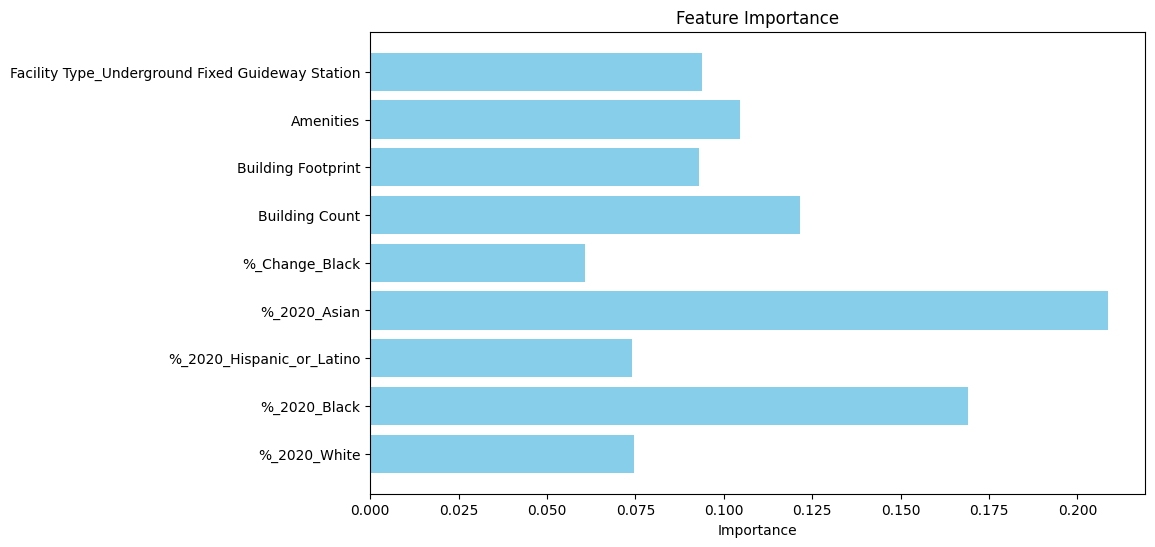

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('/content/For_Regression_home_rent_REv2..csv')

# Prepare the features and target variable, excluding the specified columns
X = data.drop(['Facility ID', '2020 Median Home Value'], axis=1)
y = data['2020 Median Home Value']

# Identify categorical columns for one-hot encoding
categorical_cols = ['Presence of Highway', 'Cluster Name', 'Primary Mode Served', 'Facility Type', 'Mode_Type', 'System', 'Decade Built', 'Station Proximity']

# OneHotEncoder instance to transform categorical variables
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_cols])

# Create a new DataFrame from the encoded variables
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Combine the encoded DataFrame with the original data (excluding targets and categorical columns)
X_preprocessed = pd.concat([X.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Fill missing values for numerical features with their median
X_preprocessed = X_preprocessed.fillna(X_preprocessed.median())

# Removing rows with missing values in the target variable '2020 Median Home Value'
data_cleaned = data.dropna(subset=['2020 Median Home Value'])
y_cleaned = data_cleaned['2020 Median Home Value']
X_cleaned = X_preprocessed.loc[data_cleaned.index, :]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Standardize the target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Initialize the Random Forest model
rf_reg = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42
)

# Initialize RFECV
selector = RFECV(estimator=rf_reg, step=1, cv=KFold(5), scoring='r2')
selector.fit(X_train, y_train_scaled)

# Identify the optimal features
optimal_features = X_train.columns[selector.support_]

# Train the final model with the selected features only
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
rf_reg.fit(X_train_selected, y_train_scaled)

# Get feature importances
importances = rf_reg.feature_importances_

# Create a bar chart for feature importances
plt.figure(figsize=(10, 6))
plt.barh(optimal_features, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


# **Hyperparameter Tuning with Randomized Search**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, None]
}

# Random search of parameters
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(X_train_cleaned, y_train_cleaned_scaled)

# Print the best parameters and the corresponding score
print("Best Parameters:", rf_random.best_params_)
print("Best Score:", rf_random.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 500, 'max_depth': 20}
Best Score: 0.49775830908232654


## **Re-Run Model with Adjusted HyperParameters**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('/content/For_Regression_home_rent_REv2..csv')

# Prepare the features and target variable, excluding the specified columns
X = data.drop(['Facility ID', '2020 Median Home Value'], axis=1)
y = data['2020 Median Home Value']

# Identify categorical columns for one-hot encoding
categorical_cols = ['Presence of Highway', 'Cluster Name', 'Primary Mode Served', 'Facility Type', 'Mode_Type', 'System', 'Decade Built', 'Station Proximity']

# OneHotEncoder instance to transform categorical variables
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_cols])

# Create a new DataFrame from the encoded variables
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Combine the encoded DataFrame with the original data (excluding targets and categorical columns)
X_preprocessed = pd.concat([X.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Fill missing values for numerical features with their median
X_preprocessed = X_preprocessed.fillna(X_preprocessed.median())

# Removing rows with missing values in the target variable '2020 Median Home Value'
data_cleaned = data.dropna(subset=['2020 Median Home Value'])
y_cleaned = data_cleaned['2020 Median Home Value']
X_cleaned = X_preprocessed.loc[data_cleaned.index, :]

# Split the data into training+validation and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Further split training+validation into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Standardize the target variable for the training set
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# Standardize the target variable for the validation and test sets
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Initialize and fit the Random Forest Regression model on the scaled target using the best parameters
rf_reg = RandomForestRegressor(n_estimators=400, max_depth=20, random_state=42)
rf_reg.fit(X_train, y_train_scaled)

# Make predictions on the validation and test sets
y_val_pred_scaled = rf_reg.predict(X_val)
y_test_pred_scaled = rf_reg.predict(X_test)

# Evaluate the model on the scaled validation and test sets
r2_val_scaled = r2_score(y_val_scaled, y_val_pred_scaled)
mse_val_scaled = mean_squared_error(y_val_scaled, y_val_pred_scaled)
r2_test_scaled = r2_score(y_test_scaled, y_test_pred_scaled)
mse_test_scaled = mean_squared_error(y_test_scaled, y_test_pred_scaled)

# Inverse transform the predictions to get them back on the original scale for interpretability
y_val_pred = scaler_y.inverse_transform(y_val_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()

# Evaluate the inverse-transformed predictions
r2_val = r2_score(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)


print(f'Validation R-squared score (scaled): {r2_val_scaled}')
print(f'Validation Mean Squared Error (scaled): {mse_val_scaled}')
print(f'Test R-squared score (scaled): {r2_test_scaled}')
print


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Validation R-squared score (scaled): 0.46042250331303625
Validation Mean Squared Error (scaled): 0.49022233388964265
Test R-squared score (scaled): 0.5592251709207712


<function print>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('/content/For_Regression_home_rent_REv2..csv')

# Prepare the features and target variable, excluding the specified columns
X = data.drop(['Facility ID', '2020 Median Home Value'], axis=1)
y = data['2020 Median Home Value']

# Identify categorical columns for one-hot encoding
categorical_cols = ['Presence of Highway', 'Cluster Name', 'Primary Mode Served', 'Facility Type', 'Mode_Type', 'System', 'Decade Built', 'Station Proximity']

# OneHotEncoder instance to transform categorical variables
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_cols])

# Create a new DataFrame from the encoded variables
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Combine the encoded DataFrame with the original data (excluding targets and categorical columns)
X_preprocessed = pd.concat([X.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Fill missing values for numerical features with their median
X_preprocessed = X_preprocessed.fillna(X_preprocessed.median())

# Removing rows with missing values in the target variable '2020 Median Home Value'
data_cleaned = data.dropna(subset=['2020 Median Home Value'])
y_cleaned = data_cleaned['2020 Median Home Value']
X_cleaned = X_preprocessed.loc[data_cleaned.index, :]

# Split the data into training+validation and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Further split training+validation into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Standardize the target variable for the training, validation, and test sets
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Initialize and fit the Random Forest Regression model on the scaled target using the best parameters
rf_reg = RandomForestRegressor(n_estimators=400, max_depth=20, random_state=42)
rf_reg.fit(X_train, y_train_scaled)

# Make predictions on the training, validation, and test sets
y_train_pred_scaled = rf_reg.predict(X_train)
y_val_pred_scaled = rf_reg.predict(X_val)
y_test_pred_scaled = rf_reg.predict(X_test)

# Evaluate the model on the scaled training, validation, and test sets
r2_train_scaled = r2_score(y_train_scaled, y_train_pred_scaled)
mse_train_scaled = mean_squared_error(y_train_scaled, y_train_pred_scaled)
r2_val_scaled = r2_score(y_val_scaled, y_val_pred_scaled)
mse_val_scaled = mean_squared_error(y_val_scaled, y_val_pred_scaled)
r2_test_scaled = r2_score(y_test_scaled, y_test_pred_scaled)
mse_test_scaled = mean_squared_error(y_test_scaled, y_test_pred_scaled)

# Inverse transform the predictions to get them back on the original scale for interpretability
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_val_pred = scaler_y.inverse_transform(y_val_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()

# Evaluate the inverse-transformed predictions
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'Training R-squared score (original scale): {r2_train}')



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training R-squared score (original scale): 0.9334336660687811


# **Feature Importance**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('/content/For_Regression_home_rent_REv2..csv')

# Prepare the features and target variable, excluding the specified columns
X = data.drop(['Facility ID', '2020 Median Home Value'], axis=1)
y = data['2020 Median Home Value']

# Identify categorical columns for one-hot encoding
categorical_cols = ['Presence of Highway', 'Cluster Name', 'Primary Mode Served', 'Facility Type', 'Mode_Type', 'System', 'Decade Built', 'Station Proximity']

# OneHotEncoder instance to transform categorical variables
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_cols])

# Create a new DataFrame from the encoded variables
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Combine the encoded DataFrame with the original data (excluding targets and categorical columns)
X_preprocessed = pd.concat([X.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Fill missing values for numerical features with their median
X_preprocessed = X_preprocessed.fillna(X_preprocessed.median())

# Removing rows with missing values in the target variable '2020 Median Home Value'
data_cleaned = data.dropna(subset=['2020 Median Home Value'])
y_cleaned = data_cleaned['2020 Median Home Value']
X_cleaned = X_preprocessed.loc[data_cleaned.index, :]

# Split the data into training+validation and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Further split training+validation into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Standardize the target variable for the training, validation, and test sets
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Initialize and fit the Random Forest Regression model on the scaled target using the best parameters
rf_reg = RandomForestRegressor(n_estimators=400, max_depth=20, random_state=42)
rf_reg.fit(X_train, y_train_scaled)

# Feature importance extraction
importances = rf_reg.feature_importances_
feature_names = X_cleaned.columns
forest_importances = pd.Series(importances, index=feature_names)

# Top 20 most important features
top_features = forest_importances.nlargest(20)
cumulative_importance = top_features.sum()

print("Top 20 most important features:")
print(top_features)
print(f"\nCumulative importance of the top 20 features: {cumulative_importance:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Top 20 most important features:
%_2020_Asian                                               0.182031
%_2020_Black                                               0.134042
Building Count                                             0.095090
Amenities                                                  0.071837
Building Footprint                                         0.071128
%_2020_Hispanic_or_Latino                                  0.044856
%_Change_Black                                             0.042593
%_2020_White                                               0.039509
%_Change_White                                             0.031516
% Natural Features                                         0.028204
%_Change_Hispanic_or_Latino                                0.025954
%_Change_Asian                                             0.023754
Facility Type_Underground Fixed Guideway Station           0.023309
Walk Score                                                 0.020543
Desginated Land 

# **Apply Random Forest Model to 2020 Rents**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('/content/For_Regression_home_rent_RE.csv')

# Prepare the features and target variable, excluding the specified columns
X = data.drop(['Facility ID', '2020 Median Rent'], axis=1)
y = data['2020 Median Rent']

# Identify categorical columns for one-hot encoding
categorical_cols = ['Presence of Highway', 'Cluster Name', 'Primary Mode Served', 'Facility Type', 'Mode_Type', 'System', 'Decade Built', 'Station Proximity']

# OneHotEncoder instance to transform categorical variables
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_cols])

# Create a new DataFrame from the encoded variables
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Combine the encoded DataFrame with the original data (excluding targets and categorical columns)
X_preprocessed = pd.concat([X.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Fill missing values for numerical features with their median
X_preprocessed = X_preprocessed.fillna(X_preprocessed.median())

# Removing rows with missing values in the target variable '2020 Median Home Value'
data_cleaned = data.dropna(subset=['2020 Median Rent'])
y_cleaned = data_cleaned['2020 Median Rent']
X_cleaned = X_preprocessed.loc[data_cleaned.index, :]

# Split the data into training+validation and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Further split training+validation into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Standardize the target variable for the training set
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# Standardize the target variable for the validation and test sets
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Initialize and fit the Random Forest Regression model on the scaled target using the best parameters
rf_reg = RandomForestRegressor(n_estimators=400, max_depth=20, random_state=42)
rf_reg.fit(X_train, y_train_scaled)

# Make predictions on the validation and test sets
y_val_pred_scaled = rf_reg.predict(X_val)
y_test_pred_scaled = rf_reg.predict(X_test)

# Evaluate the model on the scaled validation and test sets
r2_val_scaled = r2_score(y_val_scaled, y_val_pred_scaled)
mse_val_scaled = mean_squared_error(y_val_scaled, y_val_pred_scaled)
r2_test_scaled = r2_score(y_test_scaled, y_test_pred_scaled)
mse_test_scaled = mean_squared_error(y_test_scaled, y_test_pred_scaled)

# Inverse transform the predictions to get them back on the original scale for interpretability
y_val_pred = scaler_y.inverse_transform(y_val_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()

# Evaluate the inverse-transformed predictions
r2_val = r2_score(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)


print(f'Validation R-squared score (scaled): {r2_val_scaled}')
print(f'Validation Mean Squared Error (scaled): {mse_val_scaled}')
print(f'Test R-squared score (scaled): {r2_test_scaled}')
print


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Validation R-squared score (scaled): 0.9864235098651954
Validation Mean Squared Error (scaled): 0.013070293095988334
Test R-squared score (scaled): 0.9684571280681674


<function print>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('/content/For_Regression_home_rent_RE.csv')

# Prepare the features and target variable, excluding the specified columns
X = data.drop(['Facility ID', '2020 Median Rent'], axis=1)
y = data['2020 Median Rent']

# Identify categorical columns for one-hot encoding
categorical_cols = ['Presence of Highway', 'Cluster Name', 'Primary Mode Served', 'Facility Type', 'Mode_Type', 'System', 'Decade Built', 'Station Proximity']

# OneHotEncoder instance to transform categorical variables
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_cols])

# Create a new DataFrame from the encoded variables
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Combine the encoded DataFrame with the original data (excluding targets and categorical columns)
X_preprocessed = pd.concat([X.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Fill missing values for numerical features with their median
X_preprocessed = X_preprocessed.fillna(X_preprocessed.median())

# Removing rows with missing values in the target variable '2020 Median Home Value'
data_cleaned = data.dropna(subset=['2020 Median Rent'])
y_cleaned = data_cleaned['2020 Median Rent']
X_cleaned = X_preprocessed.loc[data_cleaned.index, :]

# Split the data into training+validation and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Further split training+validation into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Standardize the target variable for the training, validation, and test sets
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Initialize and fit the Random Forest Regression model on the scaled target using the best parameters
rf_reg = RandomForestRegressor(n_estimators=400, max_depth=20, random_state=42)
rf_reg.fit(X_train, y_train_scaled)

# Make predictions on the training, validation, and test sets
y_train_pred_scaled = rf_reg.predict(X_train)
y_val_pred_scaled = rf_reg.predict(X_val)
y_test_pred_scaled = rf_reg.predict(X_test)

# Evaluate the model on the scaled training, validation, and test sets
r2_train_scaled = r2_score(y_train_scaled, y_train_pred_scaled)
mse_train_scaled = mean_squared_error(y_train_scaled, y_train_pred_scaled)
r2_val_scaled = r2_score(y_val_scaled, y_val_pred_scaled)
mse_val_scaled = mean_squared_error(y_val_scaled, y_val_pred_scaled)
r2_test_scaled = r2_score(y_test_scaled, y_test_pred_scaled)
mse_test_scaled = mean_squared_error(y_test_scaled, y_test_pred_scaled)

# Inverse transform the predictions to get them back on the original scale for interpretability
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_val_pred = scaler_y.inverse_transform(y_val_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()

# Evaluate the inverse-transformed predictions
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'Training R-squared score (original scale): {r2_train}')



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training R-squared score (original scale): 0.9965923424643356


# **Feature Importance for Median Rents**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('/content/For_Regression_home_rent_RE.csv')

# Prepare the features and target variable, excluding the specified columns
X = data.drop(['Facility ID', '2020 Median Rent'], axis=1)
y = data['2020 Median Rent']

# Identify categorical columns for one-hot encoding
categorical_cols = ['Presence of Highway', 'Cluster Name', 'Primary Mode Served', 'Facility Type', 'Mode_Type', 'System', 'Decade Built', 'Station Proximity']

# OneHotEncoder instance to transform categorical variables
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_cols])

# Create a new DataFrame from the encoded variables
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Combine the encoded DataFrame with the original data (excluding targets and categorical columns)
X_preprocessed = pd.concat([X.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Fill missing values for numerical features with their median
X_preprocessed = X_preprocessed.fillna(X_preprocessed.median())

# Removing rows with missing values in the target variable '2020 Median Home Value'
data_cleaned = data.dropna(subset=['2020 Median Rent'])
y_cleaned = data_cleaned['2020 Median Rent']
X_cleaned = X_preprocessed.loc[data_cleaned.index, :]

# Split the data into training+validation and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Further split training+validation into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Standardize the target variable for the training, validation, and test sets
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Initialize and fit the Random Forest Regression model on the scaled target using the best parameters
rf_reg = RandomForestRegressor(n_estimators=400, max_depth=20, random_state=42)
rf_reg.fit(X_train, y_train_scaled)

# Feature importance extraction
importances = rf_reg.feature_importances_
feature_names = X_cleaned.columns
forest_importances = pd.Series(importances, index=feature_names)

# Top 20 most important features
top_features = forest_importances.nlargest(20)
cumulative_importance = top_features.sum()

print("Top 20 most important features:")
print(top_features)
print(f"\nCumulative importance of the top 20 features: {cumulative_importance:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Top 20 most important features:
2010 Median Rent               0.602727
% R Change                     0.335148
2020 Median Home Value         0.025939
%_2020_Asian                   0.004450
Block Group Size Change        0.003344
Building Footprint             0.003070
2020 Housing Units             0.002953
2010 Housing Units             0.002563
%_2020_White                   0.001674
Building Count                 0.001534
% Housing  Change 2010-2020    0.001360
%_2020_Hispanic_or_Latino      0.001092
% HV Change.1                  0.001083
2010 Median Home Value         0.001007
%_Change_Black                 0.000950
%_2020_Black                   0.000876
%_Change_Hispanic_or_Latino    0.000850
%_Change_Asian                 0.000785
Amenities                      0.000749
% Natural Features             0.000738
dtype: float64

Cumulative importance of the top 20 features: 0.9929


# **Apply Original RF Model to Change in Home Values**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('/content/For_Regression_home_rent_RE.csv')

# Prepare the features and target variable, excluding the specified columns
X = data.drop(['Facility ID', '% HV Change'], axis=1)
y = data['% HV Change']

# Identify categorical columns for one-hot encoding
categorical_cols = ['Presence of Highway', 'Cluster Name', 'Primary Mode Served', 'Facility Type', 'Mode_Type', 'System', 'Decade Built', 'Station Proximity']

# OneHotEncoder instance to transform categorical variables
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_cols])

# Create a new DataFrame from the encoded variables
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Combine the encoded DataFrame with the original data (excluding targets and categorical columns)
X_preprocessed = pd.concat([X.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Fill missing values for numerical features with their median
X_preprocessed = X_preprocessed.fillna(X_preprocessed.median())

# Removing rows with missing values in the target variable '2020 Median Home Value'
data_cleaned = data.dropna(subset=['% HV Change'])
y_cleaned = data_cleaned['% HV Change']
X_cleaned = X_preprocessed.loc[data_cleaned.index, :]

# Split the data into training and testing sets, including unscaled y_test_cleaned for evaluation
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Standardize the target variable (for training set)
scaler_y = StandardScaler()
y_train_cleaned_scaled = scaler_y.fit_transform(y_train_cleaned.values.reshape(-1, 1)).flatten()

# Standardize the target variable for the test set based on the scaler fitted on the training set
y_test_cleaned_scaled = scaler_y.transform(y_test_cleaned.values.reshape(-1, 1)).flatten()

# Initialize and fit the Random Forest Regression model on the scaled target
rf_reg_cleaned = RandomForestRegressor(random_state=42)
rf_reg_cleaned.fit(X_train_cleaned, y_train_cleaned_scaled)

# Make predictions on the scaled target
y_pred_cleaned_scaled = rf_reg_cleaned.predict(X_test_cleaned)

# Evaluate the model on the scaled target
r2_cleaned_scaled_rf = r2_score(y_test_cleaned_scaled, y_pred_cleaned_scaled)
mse_cleaned_scaled_rf = mean_squared_error(y_test_cleaned_scaled, y_pred_cleaned_scaled)

# Inverse transform the predictions to get them back on the original scale for interpretability
y_pred_cleaned_rf = scaler_y.inverse_transform(y_pred_cleaned_scaled.reshape(-1, 1)).flatten()

# Evaluate the inverse-transformed predictions
r2_cleaned_rf = r2_score(y_test_cleaned, y_pred_cleaned_rf)
mse_cleaned_rf = mean_squared_error(y_test_cleaned, y_pred_cleaned_rf)

print(f'R-squared score (scaled) with Random Forest: {r2_cleaned_scaled_rf}')
print(f'Mean Squared Error (scaled) with Random Forest: {mse_cleaned_scaled_rf}')



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R-squared score (scaled) with Random Forest: 0.9754092659190758
Mean Squared Error (scaled) with Random Forest: 0.021667550539137423


# **RandomizedSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np

# Setup the parameters and distributions to sample from: parameter grid
param_dist = {
    'n_estimators': np.arange(100, 501, 50),
    'max_depth': np.arange(10, 51, 10),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a RandomForestRegressor object
rf = RandomForestRegressor(random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train_cleaned, y_train_cleaned_scaled)

# Print the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Use the best estimator to make predictions
y_pred_best_scaled = random_search.best_estimator_.predict(X_test_cleaned)
y_pred_best = scaler_y


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 30}
Best Score: 0.7873197505115073


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('/content/For_Regression_home_rent_RE.csv')

# Prepare the features and target variable, excluding the specified columns
X = data.drop(['Facility ID', '% HV Change'], axis=1)
y = data['% HV Change']

# Identify categorical columns for one-hot encoding
categorical_cols = ['Presence of Highway', 'Cluster Name', 'Primary Mode Served', 'Facility Type', 'Mode_Type', 'System', 'Decade Built', 'Station Proximity']

# OneHotEncoder instance to transform categorical variables
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_cols])

# Create a new DataFrame from the encoded variables
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Combine the encoded DataFrame with the original data (excluding targets and categorical columns)
X_preprocessed = pd.concat([X.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Fill missing values for numerical features with their median
X_preprocessed = X_preprocessed.fillna(X_preprocessed.median())

# Removing rows with missing values in the target variable '% HV Change'
data_cleaned = data.dropna(subset=['% HV Change'])
y_cleaned = data_cleaned['% HV Change']
X_cleaned = X_preprocessed.loc[data_cleaned.index, :]

# Split the data into training and testing sets, including unscaled y_test_cleaned for evaluation
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Standardize the target variable (for training set)
scaler_y = StandardScaler()
y_train_cleaned_scaled = scaler_y.fit_transform(y_train_cleaned.values.reshape(-1, 1)).flatten()

# Standardize the target variable for the test set based on the scaler fitted on the training set
y_test_cleaned_scaled = scaler_y.transform(y_test_cleaned.values.reshape(-1, 1)).flatten()

# Initialize and fit the Random Forest Regression model on the scaled target with optimized parameters
rf_reg_cleaned = RandomForestRegressor(n_estimators=150, min_samples_split=2, min_samples_leaf=2, max_features='auto', max_depth=30, random_state=42)
rf_reg_cleaned.fit(X_train_cleaned, y_train_cleaned_scaled)

# Make predictions on the scaled target
y_pred_cleaned_scaled = rf_reg_cleaned.predict(X_test_cleaned)

# Evaluate the model on the scaled target
r2_cleaned_scaled_rf = r2_score(y_test_cleaned_scaled, y_pred_cleaned_scaled)
mse_cleaned_scaled_rf = mean_squared_error(y_test_cleaned_scaled, y_pred_cleaned_scaled)

# Inverse transform the predictions to get them back on the original scale for interpretability
y_pred_cleaned_rf = scaler_y.inverse_transform(y_pred_cleaned_scaled.reshape(-1, 1)).flatten()

# Evaluate the inverse-transformed predictions
r2_cleaned_rf = r2_score(y_test_cleaned, y_pred_cleaned_rf)
mse_cleaned_rf = mean_squared_error(y_test_cleaned, y_pred_cleaned_rf)

print(f'R-squared score (scaled) with Random Forest: {r2_cleaned_scaled_rf}')
print(f'Mean Squared Error (scaled) with Random Forest: {mse_cleaned_scaled_rf}')



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R-squared score (scaled) with Random Forest: 0.9829626240303645
Mean Squared Error (scaled) with Random Forest: 0.015012085595392247


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('/content/For_Regression_home_rent_RE.csv')

# Prepare the features and target variable, excluding the specified columns
X = data.drop(['Facility ID', '% HV Change'], axis=1)
y = data['% HV Change']

# Identify categorical columns for one-hot encoding
categorical_cols = ['Presence of Highway', 'Cluster Name', 'Primary Mode Served', 'Facility Type', 'Mode_Type', 'System', 'Decade Built', 'Station Proximity']

# OneHotEncoder instance to transform categorical variables
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_cols])

# Create a new DataFrame from the encoded variables
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Combine the encoded DataFrame with the original data (excluding targets and categorical columns)
X_preprocessed = pd.concat([X.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Fill missing values for numerical features with their median
X_preprocessed = X_preprocessed.fillna(X_preprocessed.median())

# Removing rows with missing values in the target variable '% HV Change'
data_cleaned = data.dropna(subset=['% HV Change'])
y_cleaned = data_cleaned['% HV Change']
X_cleaned = X_preprocessed.loc[data_cleaned.index, :]

# Split the data into training+validation and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Further split training+validation into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Standardize the target variable for all sets
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Initialize and fit the Random Forest Regression model on the scaled training data with optimized parameters
rf_reg = RandomForestRegressor(n_estimators=150, min_samples_split=2, min_samples_leaf=2, max_features='auto', max_depth=30, random_state=42)
rf_reg.fit(X_train, y_train_scaled)

# Predict and calculate R-squared for each set
y_train_pred_scaled = rf_reg.predict(X_train)
y_val_pred_scaled = rf_reg.predict(X_val)
y_test_pred_scaled = rf_reg.predict(X_test)

r2_train = r2_score(y_train_scaled, y_train_pred_scaled)
r2_val = r2_score(y_val_scaled, y_val_pred_scaled)
r2_test = r2_score(y_test_scaled, y_test_pred_scaled)

# Print R-squared results
print(f'R-squared score for Training set: {r2_train:.4f}')
print(f'R-squared score for Validation set: {r2_val:.4f}')
print(f'R-squared score for Test set: {r2_test:.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R-squared score for Training set: 0.9555
R-squared score for Validation set: 0.5885
R-squared score for Test set: 0.9057


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('/content/For_Regression_home_rent_REv2..csv')

# Prepare the features and target variable, excluding the specified columns
X = data.drop(['Facility ID', '2020 Median Home Value'], axis=1)
y = data['2020 Median Home Value']

# Identify categorical columns for one-hot encoding
categorical_cols = ['Presence of Highway', 'Cluster Name', 'Primary Mode Served', 'Facility Type', 'Mode_Type', 'System', 'Decade Built', 'Station Proximity']

# OneHotEncoder instance to transform categorical variables
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_cols])

# Create a new DataFrame from the encoded variables
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Combine the encoded DataFrame with the original data (excluding targets and categorical columns)
X_preprocessed = pd.concat([X.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Fill missing values for numerical features with their median
X_preprocessed = X_preprocessed.fillna(X_preprocessed.median())

# Removing rows with missing values in the target variable '2020 Median Home Value'
data_cleaned = data.dropna(subset=['2020 Median Home Value'])
y_cleaned = data_cleaned['2020 Median Home Value']
X_cleaned = X_preprocessed.loc[data_cleaned.index, :]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Standardize the target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Initialize the Random Forest model
rf_reg = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42
)

# Initialize RFECV
selector = RFECV(estimator=rf_reg, step=1, cv=KFold(5), scoring='r2')
selector.fit(X_train, y_train_scaled)

# Identify the optimal features
optimal_features = X_train.columns[selector.support_]

# Train the final model with the selected features only
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
rf_reg.fit(X_train_selected, y_train_scaled)

# Get feature importances
importances = rf_reg.feature_importances_

# Create a table of feature importances
feature_importance_df = pd.DataFrame({
    'Feature': optimal_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the table
print(feature_importance_df)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


                                            Feature  Importance
3                                      %_2020_Asian    0.208761
1                                      %_2020_Black    0.169128
5                                    Building Count    0.121443
7                                         Amenities    0.104488
8  Facility Type_Underground Fixed Guideway Station    0.093765
6                                Building Footprint    0.092934
0                                      %_2020_White    0.074532
2                         %_2020_Hispanic_or_Latino    0.074129
4                                    %_Change_Black    0.060818
